# Pokémon for Data Mining and Machine Learning

# Team name: JustFrag
# Team members:
    Oğuz Gül
    Nuri Akseli
    Ümmügülsüm Kaşıkçı

## 1-) Reading Pokemon CSV

In [50]:
import pandas as pd 
import seaborn as sns
data = pd.read_csv('dataset/pokemon_alopez247.csv')
data.head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In pokemon dataset, there are 23 coloumns and they are ;

In [3]:
for i in data.columns:
    print(i)

Number
Name
Type_1
Type_2
Total
HP
Attack
Defense
Sp_Atk
Sp_Def
Speed
Generation
isLegendary
Color
hasGender
Pr_Male
Egg_Group_1
Egg_Group_2
hasMegaEvolution
Height_m
Weight_kg
Catch_Rate
Body_Style


    *Number          : Entry number of this pokemon
    *Name            : Pokemon's name
    *Type_1          : every pokemon has a type and it determine how strong they are to other pokemons
    *Type_2          : Some pokemon has one more type and they shows two type's features
    *Total           : Sum of all statictics of the pokemon
    *HP              : Health of the pokemon it shows how much damage can take the pokemon
    *Attack          : Pokemon's hit power
    *Defense         : Pokemon's defense power against the normal hit
    *Sp_Atk          : Pokemon's special attack power
    *Sp_Def          : Pokemon's defense power against the special hit
    *Speed           : Speed of the pokemon. It determine that pokemon can attack how much quick
    *Generation      : it shows the pokemon's release season
    *isLegendary     : Some of the pokemons are stronger than other and hard to find they called legendary
    *Color           : The color of the pokemon
    *hasGender       : Some pokemon's have male and female type
    *Pr_Male         : Pokemon has gender and the probability of its being male
    *Egg_Group_1     : it determine pokemon's type when it is in egg
    *Egg_Group_2     : it is similiar to Egg_Group_1
    *hasMegaEvolution: Some pokemon has stronger form that they can transform for some time with a stone
    *Height_m        : Height of the pokemon as meter
    *Weight_kg       : Weight of the pokemon as kg
    *Catch_Rate      : Pokemon's rate that shows how easily captured
    *Body_Style      : Body style of the Pokémon according to the Pokédex


There are 721 data in this dataset.

In [4]:
print("The number of data in pokemon dataset:",data['Number'].count())

The number of data in pokemon dataset: 721


## 2-) Cleaning the dataset

    After the reading the dataset, Our next step is make the dataset regular as we show that there are 721 data in pokemon dataset but some of these pokemon doesn't have Type_2 so we need to consider them also we need to seperate this dataset to pokemon's features and pokemon's statistics and some pokemon's doesn't have Egg_Group_2 so we need to cosider them too

First we need to change the Number's columns name because it does'nt show how many pokemon in release it just show pokemon's entry number so we change it as id

In [5]:
data.rename(columns={'Number': 'id'}, inplace=True)

After that, we check if there is duplicate or not and we saw there is not duplicate data to eliminate

In [6]:
data[data.duplicated('id', keep=False)].head()

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style


For next step, we fill the missing values in Type_2 as None to consider them with the pokemon that has 2 types

In [7]:
data['Type_2'].fillna(value='None', inplace=True)

After that the dataset become;

In [8]:
data.head(5)

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,None,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


For next step, we fill the missing values in Egg_Group_2 as None to consider them with the pokemon that has two egg groups

In [9]:
data['Egg_Group_2'].fillna(value='None', inplace=True)

For the next step we seperate the dataset in to two part Pokedex that contain pokemon's features

In [10]:
Pokedex = data[['id', 'Name', 'Type_1', 'Type_2', 'Generation', 'isLegendary']]
Pokedex.head(5)

,id,Name,Type_1,Type_2,Generation,isLegendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
3,4,Charmander,Fire,None,1,False
4,5,Charmeleon,Fire,None,1,False


 and Statistic that contain Pokemon's statistics;

In [11]:
Statistics = pd.merge(data,Pokedex,on='id'
                     ).loc[:, ['id', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Total','Color','hasGender','Pr_Male','Egg_Group_1','Egg_Group_2','hasMegaEvolution','Height_m','Weight_kg','Catch_Rate','Body_Style']]
Statistics.head(5)

,id,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,45,49,49,65,65,45,318,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,60,62,63,80,80,60,405,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,80,82,83,100,100,80,525,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,39,52,43,60,50,65,309,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,58,64,58,80,65,80,405,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


After that, our dataset become regular.

## 3-) Pokemon's statistics

in the next step we look at the pokemon's numbers accordng to their generations;

In [12]:
Pokedex.groupby('Generation').size().plot.bar()

As you see, season that is odd numbers release more pokemon than season that even numbers if we compared both of them

In the next step we look at the total number of type_1

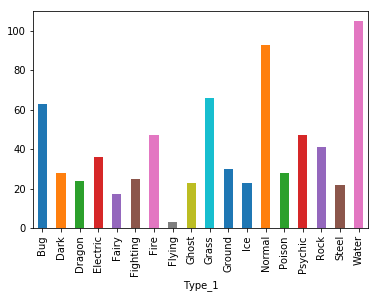

In [13]:
Pokedex.groupby('Type_1').size().plot.bar()


as you can see water type and normal type pokemon's size greater than others so in pokemon world you can see this types mostly

After that we look at type_2's statistics

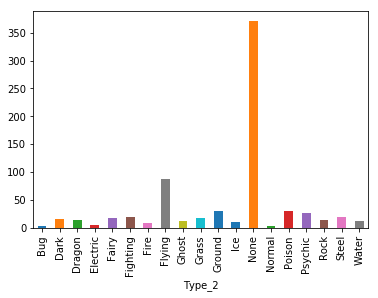

In [14]:
Pokedex.groupby('Type_2').size().plot.bar()

as you can see most pokemon doesn't have second type also mostly flying type pokemon has two types

When we compare the seasons in season 4,5 and 6 we saw that the common pokemon type has changed. In season 4;

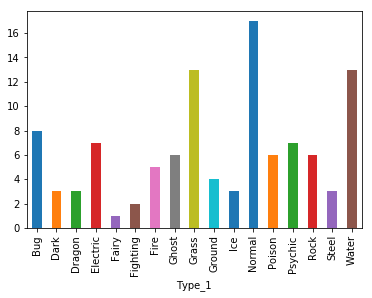

In [15]:
Pokedex[Pokedex.Generation==4].groupby('Type_1').size().plot.bar()

as we see the figure in season 4 normal type pokemons are common but in season 5 it is also changed in season 5;

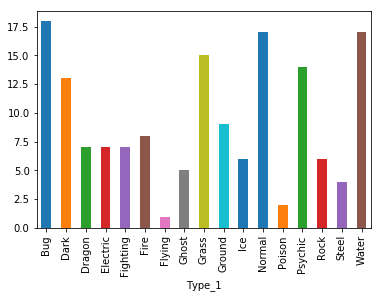

In [16]:
Pokedex[Pokedex.Generation==5].groupby('Type_1').size().plot.bar()

as we see the figure at the top in season 5 bug type pokemons are common but in season 6 it is also changed in season 6;

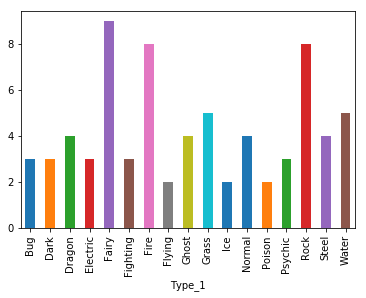

In [17]:
Pokedex[Pokedex.Generation==6].groupby('Type_1').size().plot.bar()

also in season 6 fairy type pokemons are common but if we look at the total in pokemon world there are mostly water type pokemon

## 4-) Pokemons Gender

    In our dataset, pokemon's gender is exist so in this part we are looking at the gender statistics of pokemons

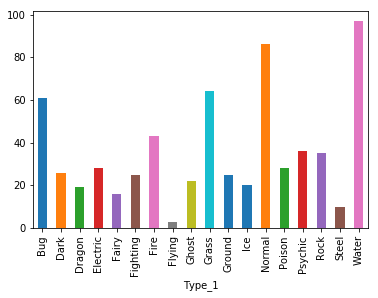

In [66]:
Pokedex[Statistics.hasGender==True].groupby('Type_1').size().plot.bar()

as we saw in the figure water type pokemon has gender at most and if we are looking at the pokemon which doesn't have gender;

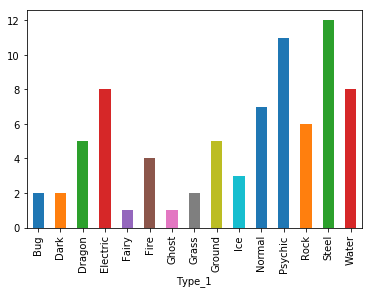

In [19]:
Pokedex[Statistics.hasGender==False].groupby('Type_1').size().plot.bar()

In the figure we saw that mostly steel type pokemon doesn't have gender and if we are looking at the possibility of being male;

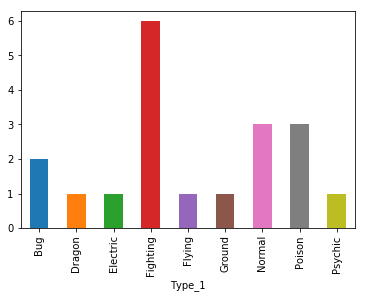

In [20]:
Pokedex[Statistics.Pr_Male==Statistics.Pr_Male.max()].groupby('Type_1').size().plot.bar()

as we saw that fighting type pokemons' gender mostly male and if we are looking at the being female

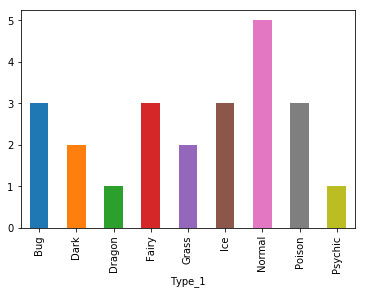

In [21]:
Pokedex[Statistics.Pr_Male==Statistics.Pr_Male.min()].groupby('Type_1').size().plot.bar()

as in the figure shown Normal type pokemons mostly born as female

## 5-) The most catchable pokemon

In this part we are looking at the pokemon which can catch easier but first we are looking at the types

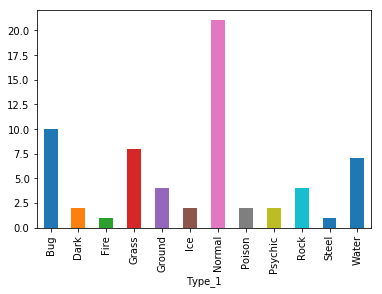

In [22]:
Pokedex[Statistics.Catch_Rate==Statistics.Catch_Rate.max()].groupby('Type_1').size().plot.bar()

as in the figure Normal type pokemons can be catch easier but we wonder the opposite of this so;

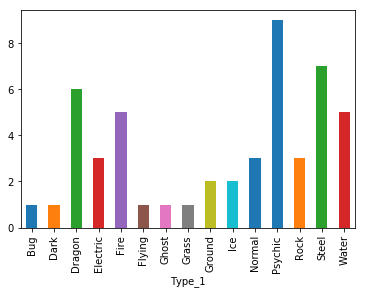

In [23]:
Pokedex[Statistics.Catch_Rate==Statistics.Catch_Rate.min()].groupby('Type_1').size().plot.bar()

if we look at the figure psychic type pokemons can be catch harder and if we looking at their names;

In [24]:
Pokedex[Statistics.Catch_Rate==Statistics.Catch_Rate.max()].head()

,id,Name,Type_1,Type_2,Generation,isLegendary
9,10,Caterpie,Bug,None,1,False
12,13,Weedle,Bug,Poison,1,False
15,16,Pidgey,Normal,Flying,1,False
18,19,Rattata,Normal,None,1,False
20,21,Spearow,Normal,Flying,1,False


also we wonder their numbers so;

In [25]:
print("The number of pokemon which can be catch easier:", Pokedex['id'][Statistics.Catch_Rate==Statistics.Catch_Rate.max()].count())

The number of pokemon which can be catch easier: 64


Also we wonder the pokemons which can be catched hardly 

In [26]:
Pokedex[Statistics.Catch_Rate==Statistics.Catch_Rate.min()].head()

,id,Name,Type_1,Type_2,Generation,isLegendary
143,144,Articuno,Ice,Flying,1,True
144,145,Zapdos,Electric,Flying,1,True
145,146,Moltres,Fire,Flying,1,True
149,150,Mewtwo,Psychic,None,1,True
242,243,Raikou,Electric,None,2,True


and we saw that legendary pokemons can be catched harly but also we wonder their numbers

In [27]:
print("The number of pokemon which can be catch harder:", Pokedex['id'][Statistics.Catch_Rate==Statistics.Catch_Rate.min()].count())

The number of pokemon which can be catch harder: 50


## 6-) The most strongest Pokemon

In this part we are searching the strongest pokemon when we do that we use z-score that can calculate like zi=xi-x/s but first we collect the data in a table

In [28]:
Powerful=pd.merge(Pokedex, Statistics, on='id').sort_values('Total', ascending=False)
Pokemon_stats= Powerful.loc[:, ['id', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Total','Height_m','Weight_kg']]
Statistics.head(5)
Powerful.head()

,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
492,493,Arceus,Normal,None,4,True,120,120,120,120,...,Grey,False,NaN,Undiscovered,None,False,3.20,320.0,3,quadruped
643,644,Zekrom,Dragon,Electric,5,True,100,150,120,120,...,Black,False,NaN,Undiscovered,None,False,2.90,345.0,3,bipedal_tailed
486,487,Giratina,Ghost,Dragon,4,True,150,120,100,120,...,Black,False,NaN,Undiscovered,None,False,6.91,650.0,3,serpentine_body
249,250,Ho-Oh,Fire,Flying,2,True,106,130,90,110,...,Red,False,NaN,Undiscovered,None,False,3.81,199.0,3,two_wings
248,249,Lugia,Psychic,Flying,2,True,106,90,130,90,...,White,False,NaN,Undiscovered,None,False,5.21,216.0,3,two_wings


After that we apply z score on the Pokemon_stats

In [29]:
stats = Pokemon_stats.drop('Total', axis='columns').set_index('id').apply(lambda x: (x - x.mean()) / x.std())
stats['Str'] = stats.sum(axis='columns')


After that we sort our data according to pokemons strength

In [30]:
stats.reset_index(inplace=True)
Powerfulstats=pd.merge(Pokedex, stats, on='id').sort_values('Str', ascending=False)
Powerfulstats.head(5)

,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Str
486,487,Giratina,Ghost,Dragon,4,True,3.157657,1.552077,0.996411,1.780677,1.136693,0.890307,5.520102,6.658311,21.692233
382,383,Groudon,Ground,None,3,True,1.223292,2.587114,2.361759,1.085943,0.766540,0.890307,2.264546,10.025478,21.204978
482,483,Dialga,Steel,Dragon,4,True,1.223292,1.552077,1.679085,2.822778,1.136693,0.890307,4.083827,7.028699,20.416757
320,321,Wailord,Water,None,3,False,3.931403,0.517040,-0.880943,0.738576,-0.899148,-0.209484,12.787652,3.829890,19.814986
383,384,Rayquaza,Dragon,Flying,3,True,1.416728,2.587114,0.655074,2.822778,0.766540,1.073605,5.615854,1.680515,16.618207


Finally we found the most strongest pokemon and it is Giratina but also we wonder the opposite of it so we are searching the weakest pokemon

In [31]:
Powerfulstats=pd.merge(Pokedex, stats, on='id').sort_values('Str')
Powerfulstats.head(5)

,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Str
190,191,Sunkern,Grass,None,2,False,-1.484820,-1.553034,-1.392949,-1.345625,-1.454378,-1.309275,-0.809081,-0.617015,-9.966176
297,298,Azurill,Normal,Fairy,3,False,-0.711074,-1.898046,-1.051612,-1.692992,-1.084225,-1.675871,-0.904833,-0.614770,-9.633423
400,401,Kricketot,Bug,None,4,False,-1.214009,-1.725540,-1.017478,-1.519309,-1.047209,-1.492573,-0.809081,-0.612526,-9.437724
264,265,Wurmple,Bug,None,3,False,-0.904510,-1.035515,-1.222280,-1.692992,-1.454378,-1.675871,-0.809081,-0.596812,-9.391440
12,13,Weedle,Bug,Poison,1,False,-1.097947,-1.380528,-1.392949,-1.692992,-1.824531,-0.576081,-0.809081,-0.601302,-9.375410


We sort the same data to reverse and we found the weakest pokemon and it Sunkern we try to find the strongest water pokemon;

In [36]:

Powerfulwater=pd.merge(Pokedex, stats, on='id').sort_values('Str', ascending=False)
Powerfulwater[Powerfulwater.Type_1=='Water'].head()


,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Str
320,321,Wailord,Water,None,3,False,3.931403,0.517040,-0.880943,0.738576,-0.899148,-0.209484,12.787652,3.829890,19.814986
381,382,Kyogre,Water,None,3,True,1.223292,0.862052,0.655074,2.822778,2.617305,0.890307,3.212488,3.313591,15.596885
483,484,Palkia,Water,Dragon,4,True,0.836418,1.552077,0.996411,2.822778,1.876999,1.256904,2.915657,3.134009,15.391252
129,130,Gyarados,Water,Flying,1,False,1.029855,1.724583,0.279603,-0.303524,1.136693,0.560369,5.127520,2.000396,11.555495
349,350,Milotic,Water,None,3,False,1.029855,-0.517997,0.279603,1.085943,2.062075,0.560369,4.840265,1.181052,10.521166


As shown in the figure waillord is the strongest pokemon after that we wonder the strongest fire pokemon;

In [38]:
Powerfulfire=pd.merge(Pokedex, stats, on='id').sort_values('Str', ascending=False)
Powerfulfire[Powerfulfire.Type_1=='Fire'].head()

,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Str
249,250,Ho-Oh,Fire,Flying,2,True,1.455415,1.897089,0.655074,1.433310,3.135519,0.890307,2.551801,1.596336,13.614851
484,485,Heatran,Fire,Steel,4,True,0.875106,0.517040,1.201213,2.128044,1.358785,0.413731,0.531442,4.189055,11.214414
720,721,Volcanion,Fire,Water,6,True,0.449545,1.207064,1.679085,2.128044,0.766540,0.157113,0.531442,1.551441,8.470273
243,244,Entei,Fire,None,2,True,1.803601,1.379571,0.484405,0.738576,0.211311,1.256904,0.924023,1.585112,8.383503
58,59,Arcanine,Fire,None,1,False,0.836418,1.207064,0.313737,1.085943,0.396387,1.073605,0.732520,1.102485,6.748160


As shown in the figure unfortunetly charizard is not the strongest fire pokemon Ho-oh is the strongest fire pokemon

In [43]:
Powerfule=pd.merge(Pokedex, stats, on='id').sort_values('Str', ascending=False)
Powerfule[Powerfule.Type_1=='Electric'].head()

,id,Name,Type_1,Type_2,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Str
242,243,Raikou,Electric,None,2,True,0.836418,0.344534,0.143068,1.606993,1.136693,1.806799,0.732520,1.360634,7.967660
144,145,Zapdos,Electric,Flying,1,True,0.836418,0.517040,0.484405,1.954360,0.766540,1.256904,0.435690,-0.046841,6.204516
641,642,Thundurus,Electric,Flying,5,True,0.410858,1.379571,-0.027600,1.954360,0.396387,1.660160,0.339938,0.047439,6.161113
465,466,Electivire,Electric,None,4,False,0.256109,1.655580,-0.130002,0.912260,0.581464,1.073605,0.627193,0.918413,5.894622
461,462,Magnezone,Electric,Steel,4,False,0.062672,-0.172985,1.508416,2.128044,0.766540,-0.209484,0.043108,1.383082,5.509394


As shown in the figure Raikou is the strongest electiric pokemon

# 7-) the strongest type

Pokemon's types determine the pokemon's strength mostly so we decide to analyse the strongest pokemon

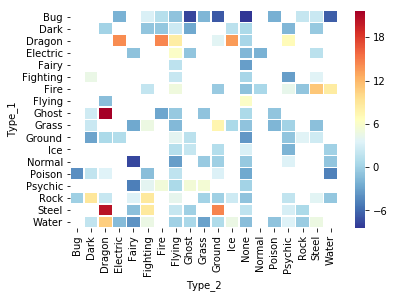

In [59]:
types = pd.merge(Pokedex,stats,on='id')

strongest_comb = types.groupby(['Type_1', 'Type_2']).median().loc[:, 'Str']

sns.heatmap(strongest_comb.unstack(),linewidths=0.5,cmap='RdYlBu_r');

we tried to show the strongest types in the figure after that we ordered the strongest type combination;

In [61]:
strongest_comb.reset_index().sort_values('Str', ascending=False).head()

,Type_1,Type_2,Str
53,Ghost,Dragon,21.692233
119,Steel,Dragon,20.416757
124,Steel,Ground,14.620676
22,Dragon,Fire,14.396244
21,Dragon,Electric,14.212652


as shown in the data ghost and dragon combination is the strongest combination and we also wanted to show the weakest combination;

In [62]:
weakest_comb=strongest_comb
weakest_comb.reset_index().sort_values('Str').head()

,Type_1,Type_2,Str
7,Bug,None,-8.439141
4,Bug,Ghost,-7.676983
84,Normal,Fairy,-7.514097
6,Bug,Ground,-6.752744
11,Bug,Water,-6.518920


as shown in the data bug and none type combination is the weakest combination according to dataset

# 8-) Corrolation of the pokemons' data

In [63]:
dataset=pd.merge(Pokedex, Statistics, on='id')
dataset.corr()

,id,Generation,isLegendary,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
id,1.000000,0.983329,0.135022,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.160370,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Generation,0.983329,1.000000,0.071875,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,0.092868,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.071875,1.000000,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.481837,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302
HP,0.107512,0.071545,0.258926,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.642628,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.093857,0.302786,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.704164,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.068409,0.274446,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.605831,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.069689,0.409739,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.723737,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.055421,0.360215,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.706501,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.003920,0.286082,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.548890,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Total,0.160370,0.092868,0.481837,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,1.000000,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
